In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency,  ttest_ind
import seaborn


Описание полей содержится в файле adult.names

In [2]:
data = pd.read_csv('adult.csv')  

# Описательный Анализ

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.sample(n=5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
28482,32,Private,115989,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,60,United-States,<=50K
1394,58,Federal-gov,81973,Some-college,10,Married-civ-spouse,Tech-support,Husband,Asian-Pac-Islander,Male,0,1485,40,United-States,>50K
32523,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K
29634,26,Private,176756,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
22002,44,Local-gov,68318,Masters,14,Never-married,Prof-specialty,Own-child,White,Female,0,0,55,United-States,<=50K


Узнаем типы данных каждого признака и найдем пропущенные значения:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Числовые признаки
num_cols = [
   'age',
   'fnlwgt',
   'education.num',
   'capital.gain',
   'capital.loss',
   'hours.per.week'
]

# Категориальные признаки
cat_cols = [
    'workclass',
    'education',
    'marital.status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native.country'
]

feature_cols = num_cols + cat_cols
target_col = 'income'

In [7]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## исследование числовых признаков

Видно, что большинство людей имеют 0 capital_gain и  0 capital_loss.

Это сигнализирует о потенциальных проблемах:

*   Пропущенное значение может быть записано как 0.0
*  Низкая дисперсия и асимметричное распределение
*   Некорректные данные



In [8]:
for feature in num_cols:
  print(data[feature].describe())
  print('\n')

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64


count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64


count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64


count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital.gain, dtype: float64


count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max     

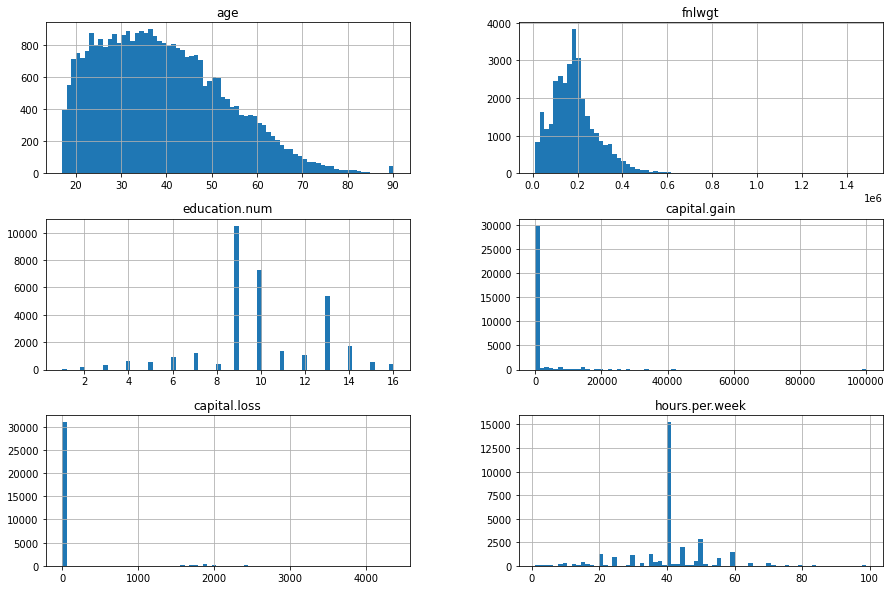

In [9]:
data.hist(column=num_cols, figsize=(15, 10), bins=73);

### исследование категориальных признаков

In [10]:
for feature in cat_cols:
  print(data[feature].describe())
  print('\n')

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object


count       32561
unique         16
top       HS-grad
freq        10501
Name: education, dtype: object


count                  32561
unique                     7
top       Married-civ-spouse
freq                   14976
Name: marital.status, dtype: object


count              32561
unique                15
top       Prof-specialty
freq                4140
Name: occupation, dtype: object


count       32561
unique          6
top       Husband
freq        13193
Name: relationship, dtype: object


count     32561
unique        5
top       White
freq      27816
Name: race, dtype: object


count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object


count             32561
unique               42
top       United-States
freq              29170
Name: native.country, dtype: object




In [11]:
def label_function(val):
    return f'{val:.0f}%'
def create_pie(data, n_row, n_col, categorical_features):
  x = ((plt.ax for j in range(0, n_col)) for i in range(0, n_row))
  fig, x = plt.subplots(n_row, n_col, figsize=(25, 20))
  feature_count = 0
  while feature_count != len(categorical_features):
    data.groupby(categorical_features[feature_count]).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                                                  ax=x[feature_count // n_col,feature_count % n_col])
    x[feature_count // n_col,feature_count % n_col].set_ylabel('')
    x[feature_count // n_col,feature_count % n_col].set_title(categorical_features[feature_count], size=30, fontweight=15)
    feature_count += 1
    
  plt.tight_layout()
  plt.show()

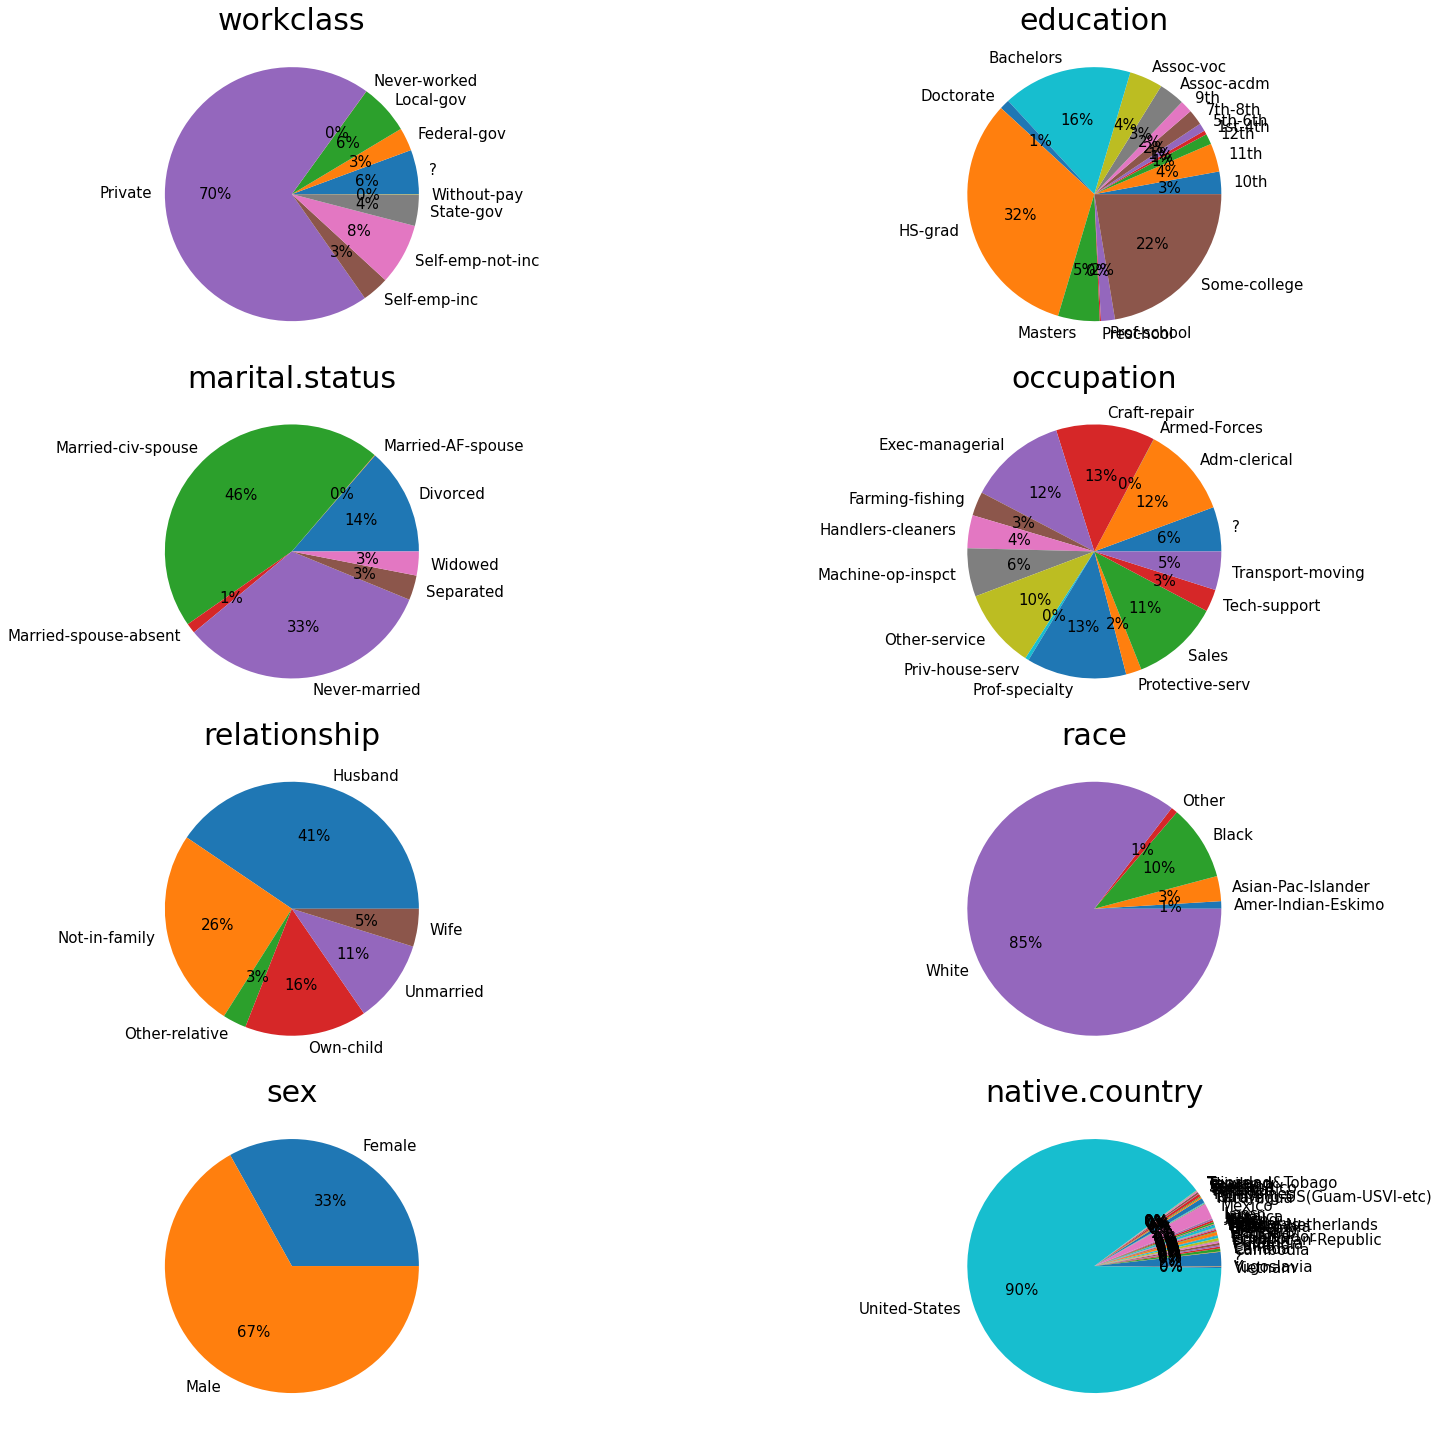

In [12]:
create_pie(data, 4, 2, cat_cols)

native.country имеет 42 уникальных значений, поэтому для этого признака лучше использовать другой способ визуализации, но даже из круговой диаграмы видно, что почти все люди из USA.

In [13]:
data['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [14]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

Интересным открытием является значительная часть значения “?” ” для функции workclass. Важно понимать, в каком случае будет использоваться “?”. Более того, мы можем заметить, что race и native.country имеет потенциально низкую энтропийную проблему, которую, возможно, потребуется предварительно обработать перед применением в модели. 

# Корреляционный анализ

### Исследование зависимости между категориальными признаками

In [15]:
pd.crosstab(data.race, data.sex, margins=True)

sex,Female,Male,All
race,,,
Amer-Indian-Eskimo,119,192,311
Asian-Pac-Islander,346,693,1039
Black,1555,1569,3124
Other,109,162,271
White,8642,19174,27816
All,10771,21790,32561


Пропорции между мужчинами и женщинами значительно различаются для разных рас. Число работающих женщин и работающих мужчин одинаково для чернокожей расы, в то время как работающих мужчин более чем в два раза больше, чем работающих женщин для белой расы. Таким образом, возможная гипотеза может заключаться в том, что значительная доля белых женщин не работает после вступления в брак.

In [16]:
col2 = ['income', 'income', 'income', 'income','income', 'income', 'income', 'income']
chi_stat = []
p_value = []
DoF = []
for feature in cat_cols:
  chisqt = pd.crosstab(data['income'], data[feature], margins=True)
  length =  len(data[feature].value_counts())
  value = np.array([chisqt.iloc[0][0:length].values,
                  chisqt.iloc[1][0:length].values])
  result_chi2 = chi2_contingency(value)[0:3]
  chi_stat.append(result_chi2[0])
  p_value.append(result_chi2[1])
  DoF.append(result_chi2[2])



In [17]:
stat_cat_features  = pd.DataFrame({'col1':cat_cols,'col2':col2, 'chi_stat':chi_stat, 'p-value': p_value, 'DoF': DoF})
stat_cat_features

,col1,col2,chi_stat,p-value,DoF
0,workclass,income,1045.708600,2.026505e-220,8
1,education,income,4429.653302,0.000000e+00,15
2,marital.status,income,6517.741654,0.000000e+00,6
3,occupation,income,4031.974280,0.000000e+00,14
4,relationship,income,6699.076897,0.000000e+00,5
5,race,income,330.920431,2.305961e-70,4
6,sex,income,1517.813409,0.000000e+00,1
7,native.country,income,317.230386,2.211386e-44,41


income сильно коррелирует с остальными категориальными признаками с очень маленьким p-value. Возможная гипотеза состоит в том, что категориальные признаки окажут положительное влияние для решения данной задачи 

### Исследование зависимости между числовыми признаками

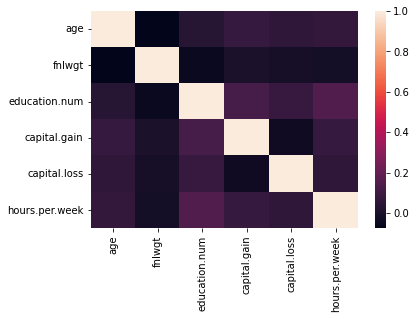

In [18]:
corr = data.corr()
seaborn.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [19]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Замечаем, что сильной зависимости между числовыми признаками нет.

### Исследование зависимости между признаками всех типов

In [20]:
col1 = ['income', 'income', 'income', 'income','income', 'income']
value_1 = ['<=50K', '<=50K', '<=50K', '<=50K', '<=50K', '<=50K']
value_2 = ['>50K', '>50K', '>50K', '>50K', '>50K', '>50K']
p_value = []
t_statistic = []

In [21]:
for feature in num_cols:
  result = ttest_ind(data[feature][data['income'] == '<=50K'], data[feature][data['income'] == '>50K'])
  t_statistic.append(result[0])
  p_value.append(result[1])

In [22]:
stat_features  = pd.DataFrame({'Categorical':col1,'Value1':value_1, 'Value2':value_2, 'Numerical': num_cols, 'p-value': p_value, 't-statistic': t_statistic})
stat_features

,Categorical,Value1,Value2,Numerical,p-value,t-statistic
0,income,<=50K,>50K,age,0.000000e+00,-43.436244
1,income,<=50K,>50K,fnlwgt,8.773666e-02,1.707511
2,income,<=50K,>50K,education.num,0.000000e+00,-64.187972
3,income,<=50K,>50K,capital.gain,0.000000e+00,-41.341868
4,income,<=50K,>50K,capital.loss,2.686547e-164,-27.474178
5,income,<=50K,>50K,hours.per.week,0.000000e+00,-42.583873


В таблице приведены результаты t-критериz Стьюдента между целевым признаком переменной и числовыми признаками. Обратите внимание, что income сильно коррелирует со всеми числовыми переменными с уровнем значимости, установленным на уровне 0,05, за исключением признака fnlwgt.

Таким образом, большинство наблюдаемых признаков коррелируют с целевой переменной, что указывает на то, что набор данных должен обладать хорошими предсказательными качествами

# Задание


*   Какими проверками вы бы дополнили анализ данного набора данных? Выполните необходимые действия и сформулируйте дополнительные гипотезы.
*   Попробуйте построить другие виды графиков, для визуального анализа.

